In [119]:
import pandas as pd
import numpy as np

df = pd.read_csv('prepared_data.csv')
df

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,is_risky
0,0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,...,0.00,2015-01-01,171.62,2016-01-01,0.0,0.0,NaN,NaN,NaN,not_risky
1,1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,...,1.11,2013-04-01,119.66,2013-09-01,0.0,0.0,NaN,NaN,NaN,risky
2,2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,...,0.00,2014-06-01,649.91,2016-01-01,0.0,0.0,NaN,NaN,NaN,not_risky
3,3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,0.00,2015-01-01,357.48,2015-01-01,0.0,0.0,NaN,NaN,NaN,not_risky
4,4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,...,0.00,2016-01-01,67.79,2016-01-01,0.0,0.0,NaN,NaN,NaN,not_risky
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,...,0.00,2016-01-01,432.64,2016-01-01,0.0,0.0,0.0,294998.0,29900.0,not_risky
466281,466281,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),...,0.00,2014-12-01,17.50,2016-01-01,0.0,0.0,0.0,221830.0,39400.0,risky
466282,466282,20700,20700,20700.0,60 months,16.99,514.34,D,D1,patrol,...,0.00,2016-01-01,514.34,2015-12-01,0.0,0.0,0.0,73598.0,13100.0,not_risky
466283,466283,2000,2000,2000.0,36 months,7.90,62.59,A,A4,Server Engineer Lead,...,0.00,2014-12-01,1500.68,2015-04-01,0.0,0.0,0.0,591610.0,53100.0,not_risky


In [120]:
df = df.drop(df.columns[0],axis=1)

In [121]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'is_risky'],
      dtype='object')

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Categorical: By is_risky

In [123]:
df['is_risky']

0         not_risky
1             risky
2         not_risky
3         not_risky
4         not_risky
            ...    
466280    not_risky
466281        risky
466282    not_risky
466283    not_risky
466284    not_risky
Name: is_risky, Length: 466285, dtype: object

In [137]:
import pandas as pd

# Assuming df is your DataFrame and 'is_risky' column exists
categorical_features = ['grade', 'sub_grade', 'emp_length', 'home_ownership',
                        'verification_status', 'purpose','addr_state',
                        'initial_list_status']

# Create the result table with correct column names
result_table = pd.DataFrame(columns=['Feature', 'Most Risky Value', 'Risky Count', 'Not Risky Count', 'Risky Percentage'])

# Iterate through categorical features
for feature in categorical_features:
    # Group by feature and is_risky, count occurrences
    counts = df.groupby([feature, 'is_risky']).size().unstack(fill_value=0)
    
    # Ensure both 'risky' and 'not_risky' columns exist
    if 'risky' not in counts.columns:
        counts['risky'] = 0
    if 'not_risky' not in counts.columns:
        counts['not_risky'] = 0
    
    # Calculate totals and percentages for each category
    feature_results = []
    for category in counts.index:
        risky_count = counts.loc[category, 'risky']
        not_risky_count = counts.loc[category, 'not_risky']
        total_count = risky_count + not_risky_count
        
        # Calculate risky percentage
        risky_percentage = (risky_count / total_count * 100) if total_count > 0 else 0
        
        # Store results for this category
        feature_results.append({
            'Feature': feature,
            'Most Risky Value': category,
            'Risky Count': risky_count,
            'Not Risky Count': not_risky_count,
            'Risky Percentage': f"{risky_percentage:.2f}%"
        })
    
    # Convert to DataFrame and find the row with highest risky percentage
    feature_df = pd.DataFrame(feature_results)
    feature_result = feature_df.loc[feature_df['Risky Percentage'].str.rstrip('%').astype(float).idxmax()]
    
    # Append to result table
    result_table = pd.concat([result_table, pd.DataFrame([feature_result])], ignore_index=True)

# Display the result table
result_table

,Feature,Most Risky Value,Risky Count,Not Risky Count,Risky Percentage
0,grade,G,942,2380,28.36%
1,sub_grade,G1,334,775,30.12%
2,emp_length,< 1 year,4427,31838,12.21%
3,home_ownership,OTHER,38,144,20.88%
4,verification_status,Verified,21891,146164,13.03%
5,purpose,small_business,1546,5467,22.04%
6,addr_state,NE,8,6,57.14%
7,initial_list_status,f,37122,265883,12.25%


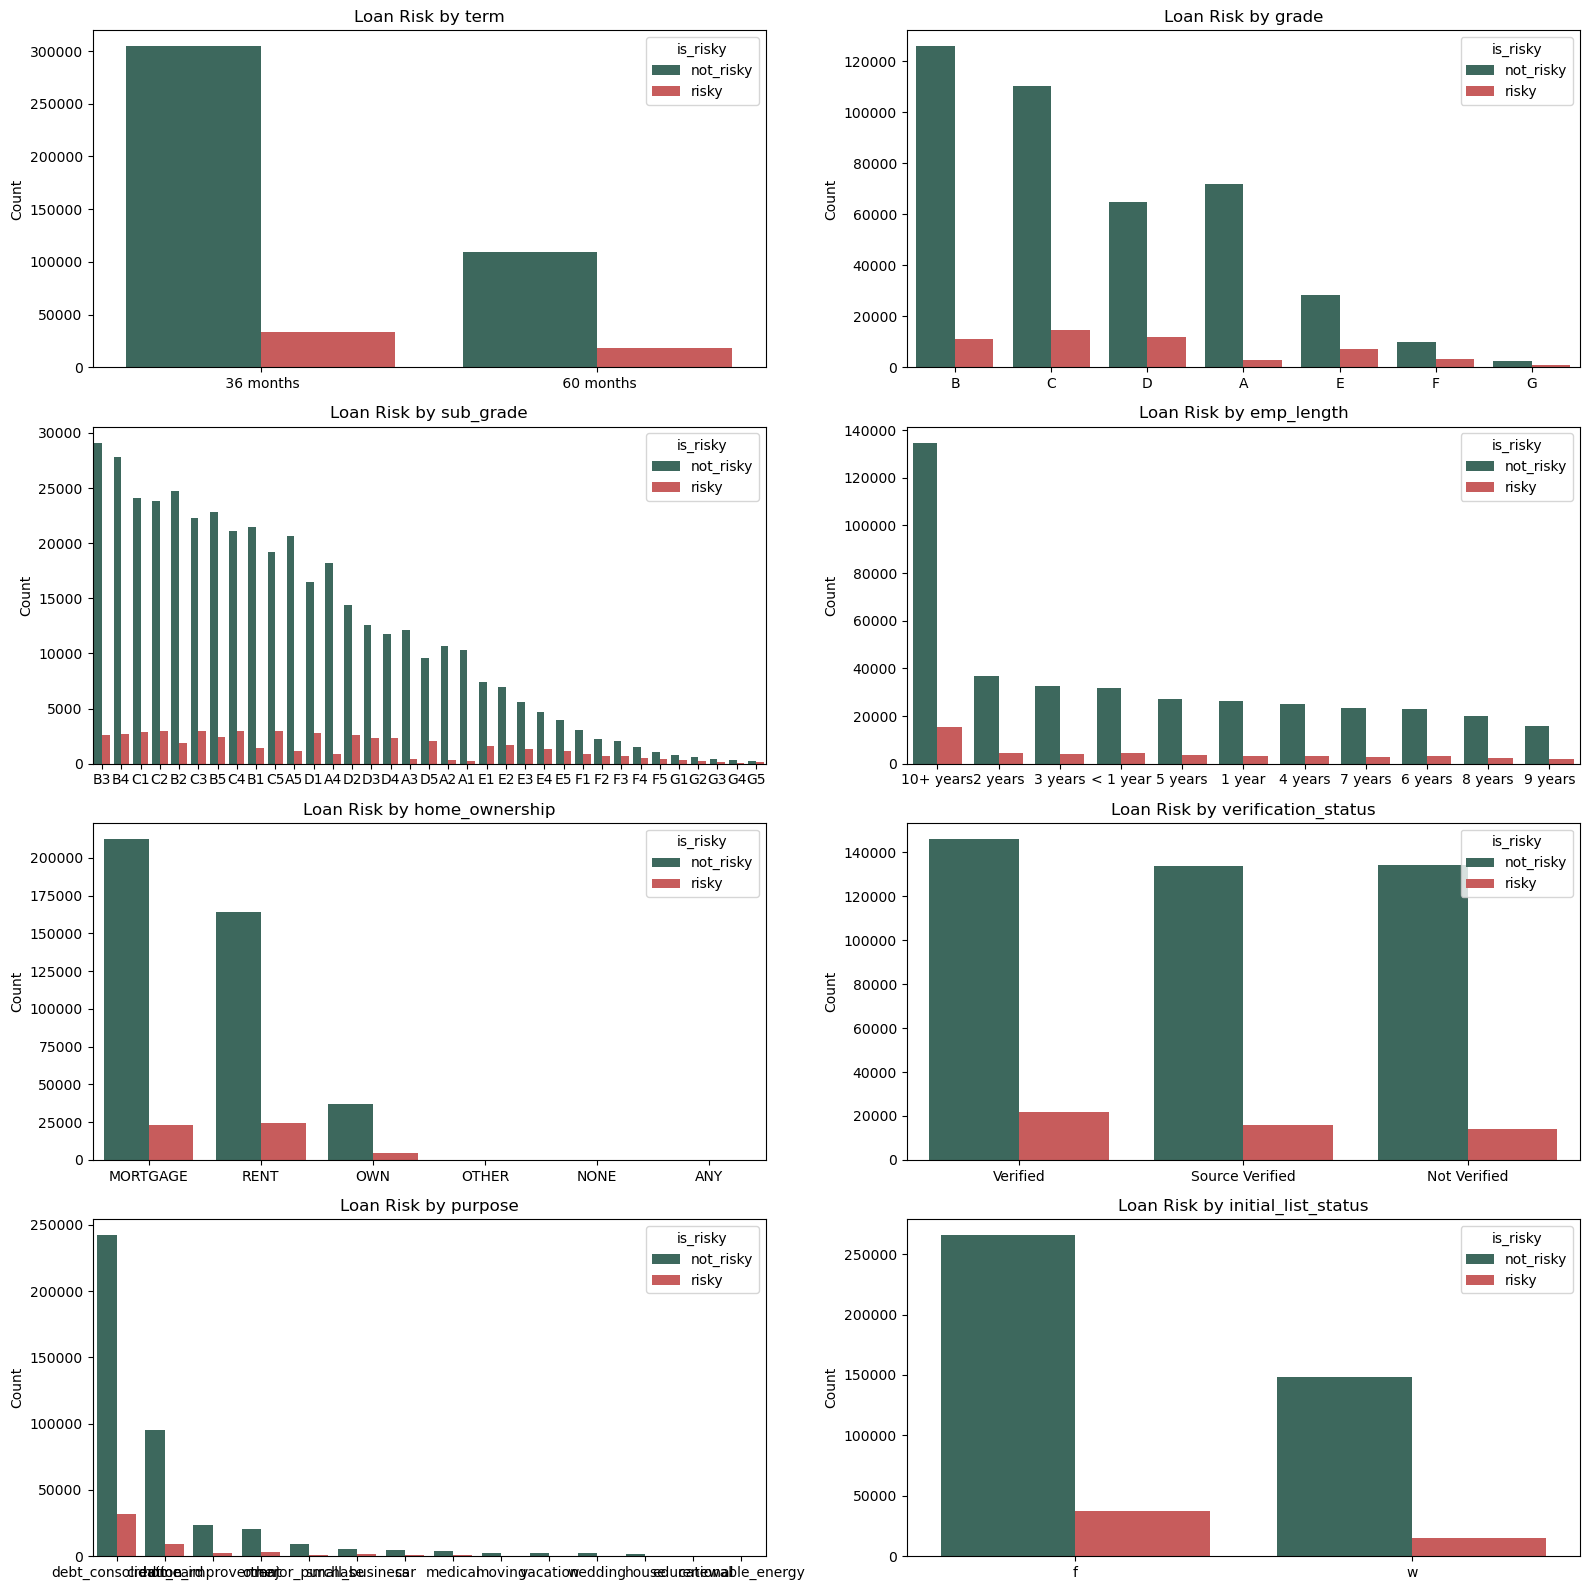

In [76]:
categorical_cols = [
    'term', 'grade', 'sub_grade', 'emp_length',
    'home_ownership', 'verification_status', 'purpose',
    'initial_list_status'
]

# Buat visualisasi barplot per kategori berdasarkan 'is_risky'
n_cols = 2
n_rows = (len(categorical_cols) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    if col in df.columns:
        sns.countplot(
            data=df,
            x=col,
            hue='is_risky',
            palette={'not_risky': '#366f61', 'risky': '#d94a4a'},
            ax=axes[idx],
            order=df[col].value_counts().index  # agar urutan berdasarkan frekuensi
        )
        axes[idx].set_title(f'Loan Risk by {col}')
        axes[idx].set_xlabel('')
        axes[idx].set_ylabel('Count')
        # axes[idx].tick_params(axis='x', rotation=30)

# Hapus subplot kosong
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

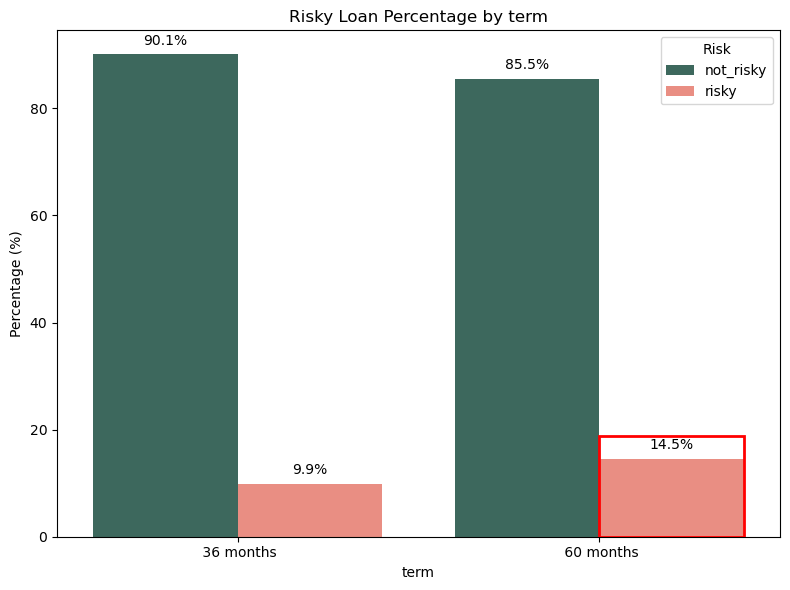

In [87]:
grouped = df.groupby(['term', 'is_risky']).size().unstack().fillna(0)
grouped.columns = ['not_risky', 'risky']
grouped['Total'] = grouped['risky'] + grouped['not_risky']
grouped['risky'] = (grouped['risky'] / grouped['Total']) * 100
grouped['not_risky'] = (grouped['not_risky'] / grouped['Total']) * 100
grouped = grouped[['risky', 'not_risky']].reset_index()
max_risk_idx = grouped['risky'].idxmax()
grouped_melt = grouped.melt(id_vars='term', value_vars=['risky', 'not_risky'], var_name='Risk', value_name='Percentage')

fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
sns.barplot(data=grouped_melt, x='term', y='Percentage', hue='Risk',
            hue_order=['not_risky', 'risky'],
            palette={'not_risky': '#366f61', 'risky': 'salmon'},
            ax=ax)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

highlight_idx = max_risk_idx * 2 + 1
risky_bar = ax.patches[highlight_idx]
bbox = risky_bar.get_bbox()
ax.add_patch(plt.Rectangle((bbox.x0, 0), bbox.width, bbox.height * 1.3,
                           fill=False, edgecolor='red', linewidth=2, zorder=10))

ax.set_title('Risky Loan Percentage by term')
ax.set_xlabel('term')
ax.set_ylabel('Percentage (%)')
ax.legend(title='Risk', loc='upper right')
plt.tight_layout()
plt.show()


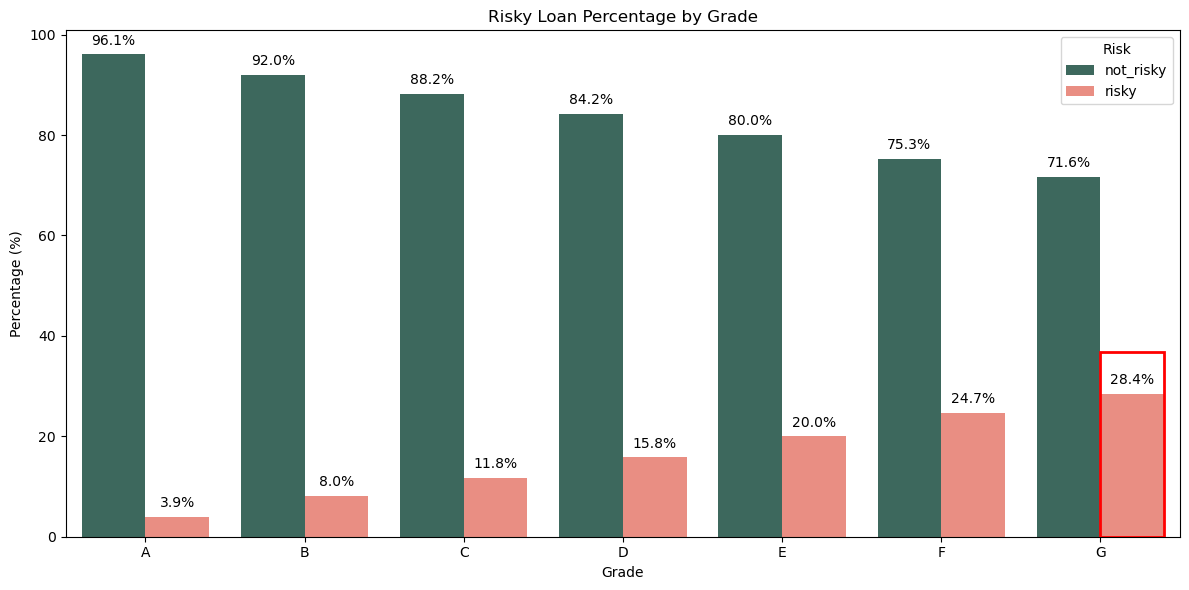

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Group data
grouped = df.groupby(['grade', 'is_risky']).size().unstack().fillna(0)
grouped.columns = ['not_risky', 'risky']

# Step 2: Hitung persentase per kategori
grouped['Total'] = grouped['risky'] + grouped['not_risky']
grouped['risky'] = (grouped['risky'] / grouped['Total']) * 100
grouped['not_risky'] = (grouped['not_risky'] / grouped['Total']) * 100
grouped = grouped[['risky', 'not_risky']].reset_index()

# Step 3: Temukan index risky tertinggi
max_risk_idx = grouped['risky'].idxmax()

# Step 4: Siapkan data untuk barplot
grouped_melt = grouped.melt(id_vars='grade', value_vars=['risky', 'not_risky'], var_name='Risk', value_name='Percentage')

# Step 5: Plot
fig, ax = plt.subplots(figsize=(12, 6), dpi=100)

sns.barplot(
    data=grouped_melt,
    x='grade',
    y='Percentage',
    hue='Risk',
    hue_order=['not_risky', 'risky'],
    palette={'not_risky': '#366f61', 'risky': 'salmon'},
    ax=ax
)

# Step 6: Tambah label persen
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

# Step 7: Kotakin bar 'risky' tertinggi
highlight_idx = max_risk_idx * 2 + 1 
risky_bar = ax.patches[highlight_idx]
bbox = risky_bar.get_bbox()
ax.add_patch(plt.Rectangle((bbox.x0, 0), bbox.width, bbox.height * 1.3,
                           fill=False, edgecolor='red', linewidth=2, zorder=10))

# Step 8: Judul dan Label
ax.set_title('Risky Loan Percentage by Grade')
ax.set_xlabel('Grade')
ax.set_ylabel('Percentage (%)')
ax.legend(title='Risk', loc='upper right')

plt.tight_layout()
plt.show()


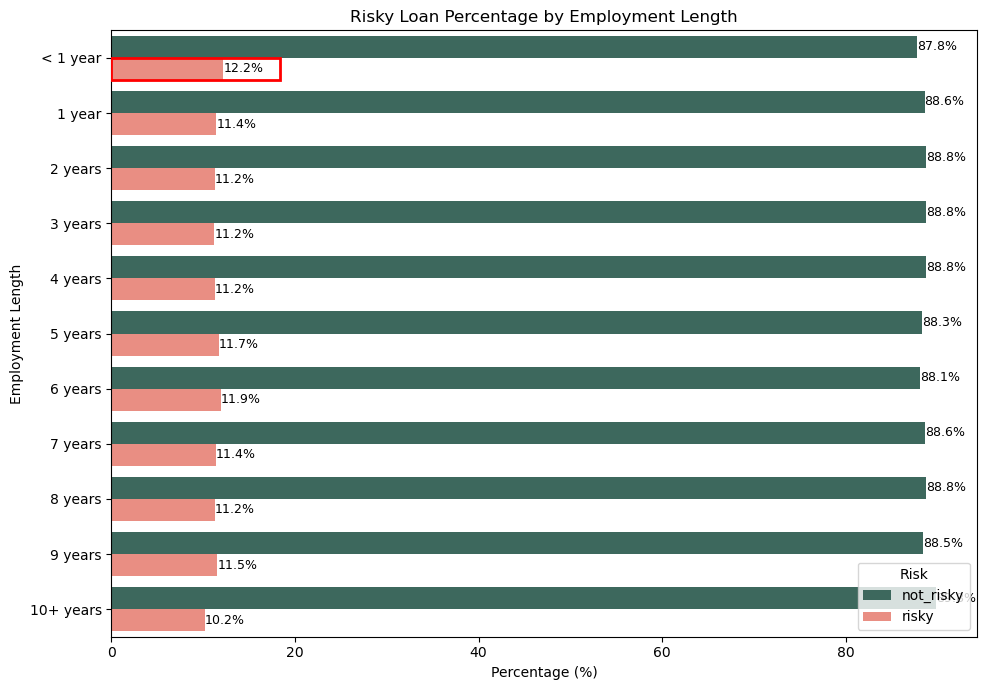

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Urutan kategori emp_length
emp_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years',
             '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']

# Hitung persentase risky dan not_risky
grouped = df.groupby(['emp_length', 'is_risky']).size().unstack(fill_value=0)
grouped = (grouped.div(grouped.sum(axis=1), axis=0) * 100).reset_index()
grouped = grouped.rename(columns={0: 'not_risky', 1: 'risky'})

# Sort berdasarkan urutan manual
grouped['emp_length'] = pd.Categorical(grouped['emp_length'], categories=emp_order, ordered=True)
grouped = grouped.sort_values('emp_length')

# Ubah ke format melt
grouped_melt = grouped.melt(id_vars='emp_length', value_vars=['risky', 'not_risky'],
                            var_name='Risk', value_name='Percentage')

# Plot
plt.figure(figsize=(10, 7), dpi=100)
ax = sns.barplot(
    data=grouped_melt,
    y='emp_length',
    x='Percentage',
    hue='Risk',
    hue_order=['not_risky', 'risky'],
    palette={'not_risky': '#366f61', 'risky': 'salmon'}
)

# Tambahkan label %
for bar in ax.patches:
    width = bar.get_width()
    if width > 0:
        plt.text(width, bar.get_y() + bar.get_height()/2, 
                 f'{width:.1f}%', ha='left', va='center', fontsize=9)

# Cari dan kotaki bar risky dengan 12.2%
for bar in ax.patches:
    if abs(bar.get_width() - 12.2) < 0.1: 
        bbox = bar.get_bbox()
        ax.add_patch(plt.Rectangle((0, bbox.y0), bbox.width * 1.5, bbox.height,
                               fill=False, edgecolor='red', linewidth=2, zorder=10))
        break

# Layout
plt.title('Risky Loan Percentage by Employment Length')
plt.xlabel('Percentage (%)')
plt.ylabel('Employment Length')
plt.legend(title='Risk', loc='lower right')
plt.tight_layout()
plt.show()

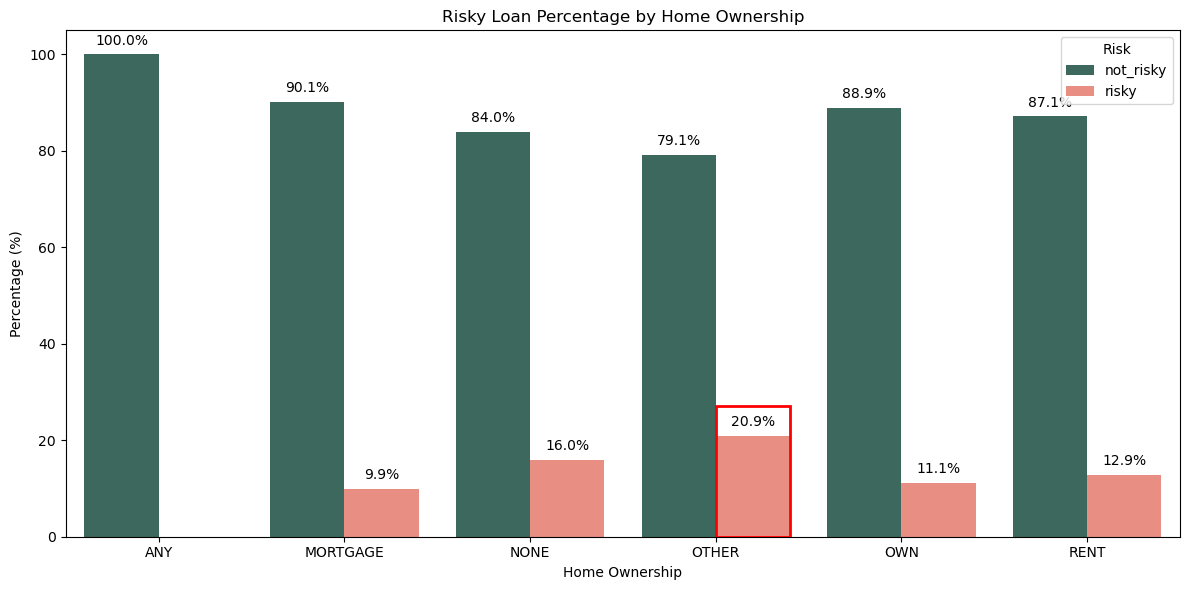

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung persentase risky dan not_risky
grouped = df.groupby(['home_ownership', 'is_risky']).size().unstack().fillna(0)
grouped.columns = ['not_risky', 'risky']
grouped['Total'] = grouped['risky'] + grouped['not_risky']
grouped['risky'] = (grouped['risky'] / grouped['Total']) * 100
grouped['not_risky'] = (grouped['not_risky'] / grouped['Total']) * 100
grouped = grouped[['risky', 'not_risky']].reset_index()
max_risk_idx = grouped['risky'].idxmax()

grouped_melt = grouped.melt(id_vars='home_ownership', value_vars=['risky', 'not_risky'], 
                            var_name='Risk', value_name='Percentage')

fig, ax = plt.subplots(figsize=(12, 6), dpi=100)
sns.barplot(data=grouped_melt, x='home_ownership', y='Percentage', hue='Risk',
            hue_order=['not_risky', 'risky'],
            palette={'not_risky': '#366f61', 'risky': 'salmon'},
            ax=ax)

# Tambahkan label %
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

# Cari dan kotaki bar risky dengan 20.9%
for bar in ax.patches:
    if abs(bar.get_height() - 20.9) < 0.1:  # toleransi kecil untuk floating point
        bbox = bar.get_bbox()
        ax.add_patch(plt.Rectangle((bbox.x0, 0), bbox.width, bbox.height * 1.3,
                               fill=False, edgecolor='red', linewidth=2, zorder=10))
        break

ax.set_title('Risky Loan Percentage by Home Ownership')
ax.set_xlabel('Home Ownership')
ax.set_ylabel('Percentage (%)')
ax.legend(title='Risk', loc='upper right')
plt.tight_layout()
plt.show()

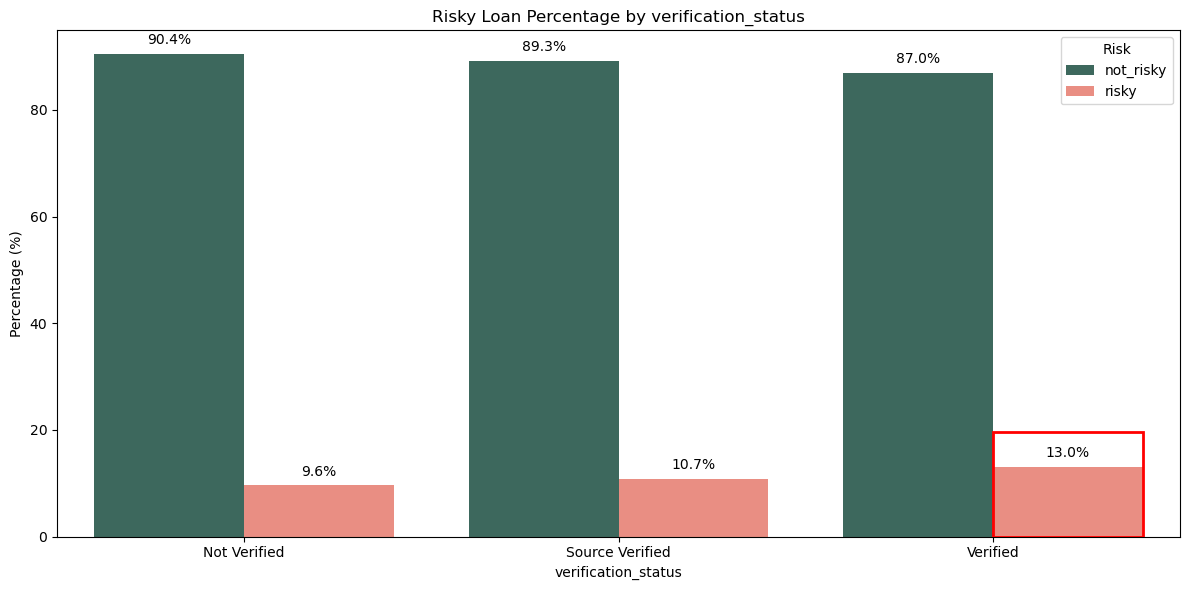

In [91]:
grouped = df.groupby(['verification_status', 'is_risky']).size().unstack().fillna(0)
grouped.columns = ['not_risky', 'risky']
grouped['Total'] = grouped['risky'] + grouped['not_risky']
grouped['risky'] = (grouped['risky'] / grouped['Total']) * 100
grouped['not_risky'] = (grouped['not_risky'] / grouped['Total']) * 100
grouped = grouped[['risky', 'not_risky']].reset_index()
max_risk_idx = grouped['risky'].idxmax()
grouped_melt = grouped.melt(id_vars='verification_status', value_vars=['risky', 'not_risky'], var_name='Risk', value_name='Percentage')

fig, ax = plt.subplots(figsize=(12, 6), dpi=100)
sns.barplot(data=grouped_melt, x='verification_status', y='Percentage', hue='Risk',
            hue_order=['not_risky', 'risky'],
            palette={'not_risky': '#366f61', 'risky': 'salmon'},
            ax=ax)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

highlight_idx = max_risk_idx * 2 + 1
risky_bar = ax.patches[highlight_idx]
bbox = risky_bar.get_bbox()
ax.add_patch(plt.Rectangle((bbox.x0, 0), bbox.width, bbox.height * 1.5,
                           fill=False, edgecolor='red', linewidth=2, zorder=10))

ax.set_title('Risky Loan Percentage by verification_status')
ax.set_xlabel('verification_status')
ax.set_ylabel('Percentage (%)')
ax.legend(title='Risk', loc='upper right')
plt.tight_layout()
plt.show()


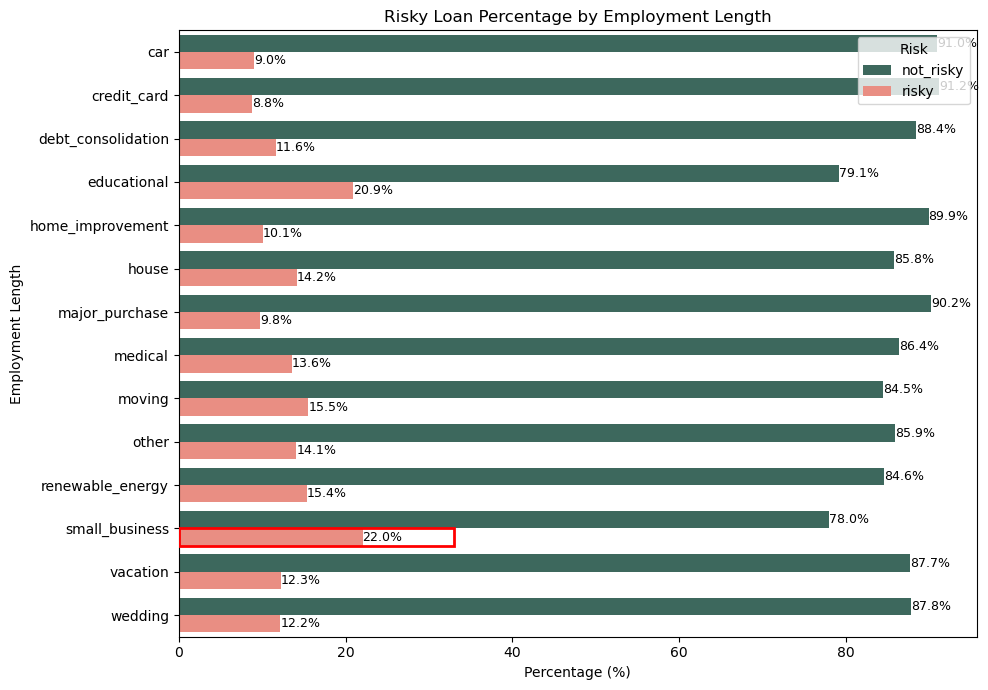

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Hitung persentase risky dan not_risky
grouped = df.groupby(['purpose', 'is_risky']).size().unstack(fill_value=0)
grouped = (grouped.div(grouped.sum(axis=1), axis=0) * 100).reset_index()
grouped = grouped.rename(columns={0: 'not_risky', 1: 'risky'})

# Sort berdasarkan urutan manual
grouped['purpose'] = pd.Categorical(grouped['purpose'])
grouped = grouped.sort_values('purpose')

# Ubah ke format melt
grouped_melt = grouped.melt(id_vars='purpose', value_vars=['risky', 'not_risky'],
                            var_name='Risk', value_name='Percentage')

# Plot
plt.figure(figsize=(10, 7), dpi=100)
ax = sns.barplot(
    data=grouped_melt,
    y='purpose',
    x='Percentage',
    hue='Risk',
    hue_order=['not_risky', 'risky'],
    palette={'not_risky': '#366f61', 'risky': 'salmon'}
)

# Tambahkan label %
for bar in ax.patches:
    width = bar.get_width()
    if width > 0:
        plt.text(width, bar.get_y() + bar.get_height()/2, 
                 f'{width:.1f}%', ha='left', va='center', fontsize=9)

# Cari dan kotaki bar risky dengan 12.2%
for bar in ax.patches:
    if abs(bar.get_width() - 22) < 0.1: 
        bbox = bar.get_bbox()
        ax.add_patch(plt.Rectangle((0, bbox.y0), bbox.width * 1.5, bbox.height,
                               fill=False, edgecolor='red', linewidth=2, zorder=10))
        break

# Layout
plt.title('Risky Loan Percentage by Employment Length')
plt.xlabel('Percentage (%)')
plt.ylabel('Employment Length')
plt.legend(title='Risk', loc='best')
plt.tight_layout()
plt.show()

C:\Users\Asty\AppData\Local\Temp\ipykernel_219908\1810652679.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = get_cmap('viridis')


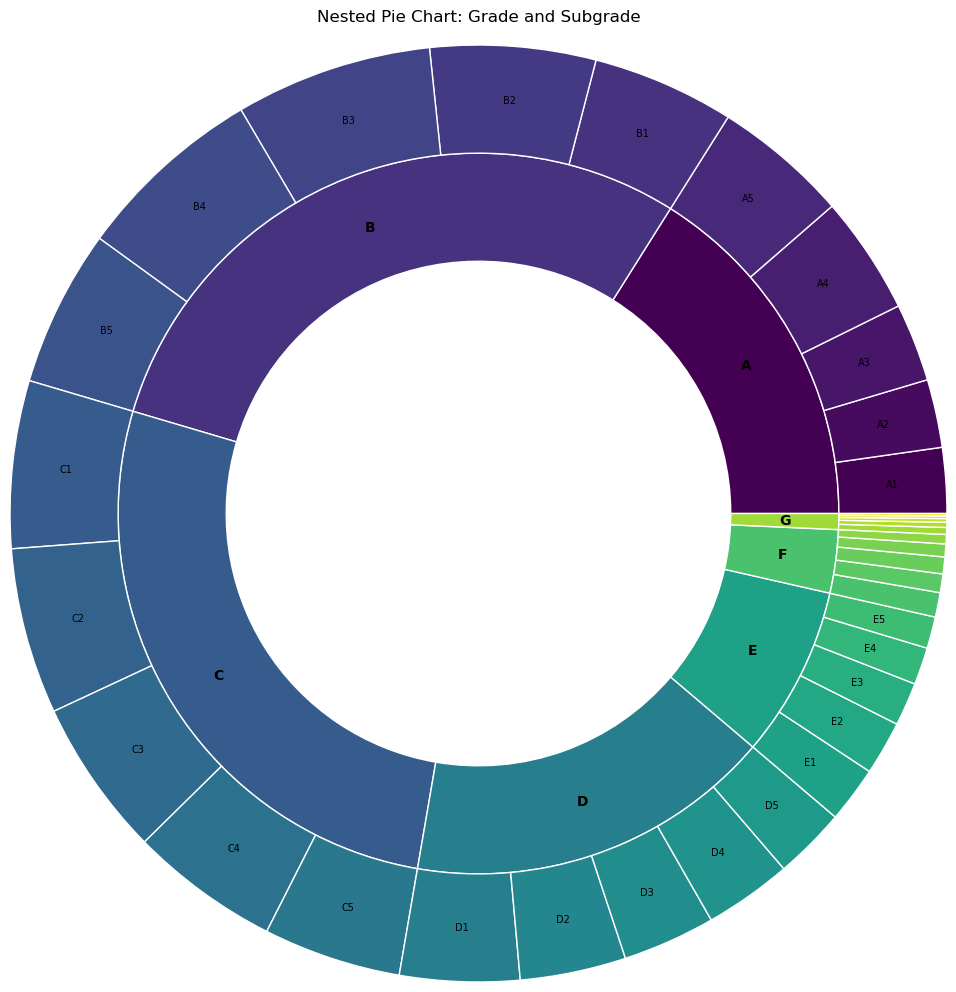

In [141]:
# Hitung ulang data untuk nested pie chart
grouped = df.groupby(['grade', 'sub_grade']).size().reset_index(name='count')
outer_labels = grouped['sub_grade']
outer_sizes = grouped['count']

inner_grouped = grouped.groupby('grade')['count'].sum().reset_index()
inner_labels = inner_grouped['grade']
inner_sizes = inner_grouped['count']

# Palet warna viridis (dipetakan ke jumlah slice)
from matplotlib.cm import get_cmap
viridis = get_cmap('viridis')
outer_colors = [viridis(i / len(outer_labels)) for i in range(len(outer_labels))]
inner_colors = [viridis(i / len(inner_labels)) for i in range(len(inner_labels))]

fig, ax = plt.subplots(figsize=(10, 10), dpi=100)

# Pie bagian dalam (GRADE)
wedges1, _ = ax.pie(
    inner_sizes, radius=1,
    labels=None,
    colors=inner_colors,
    wedgeprops=dict(width=0.3, edgecolor='white')
)

# Pie bagian luar (SUB_GRADE)
wedges2, _ = ax.pie(
    outer_sizes, radius=1.3,
    labels=None,
    colors=outer_colors,
    wedgeprops=dict(width=0.3, edgecolor='white')
)

# Tambahkan label di tengah slice
for i, p in enumerate(wedges1):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = 0.85 * np.sin(np.deg2rad(ang))
    x = 0.85 * np.cos(np.deg2rad(ang))
    ax.text(x, y, inner_labels[i], ha='center', va='center', fontsize=10, weight='bold')

for i, p in enumerate(wedges2):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = 1.15 * np.sin(np.deg2rad(ang))
    x = 1.15 * np.cos(np.deg2rad(ang))
    if outer_sizes[i] / sum(outer_sizes) > 0.01:
        ax.text(x, y, outer_labels[i], ha='center', va='center', fontsize=7)

# Set title dengan jarak dari pie
plt.title('Nested Pie Chart: Grade and Subgrade', pad=30)
ax.set(aspect="equal")
plt.tight_layout()
plt.show()


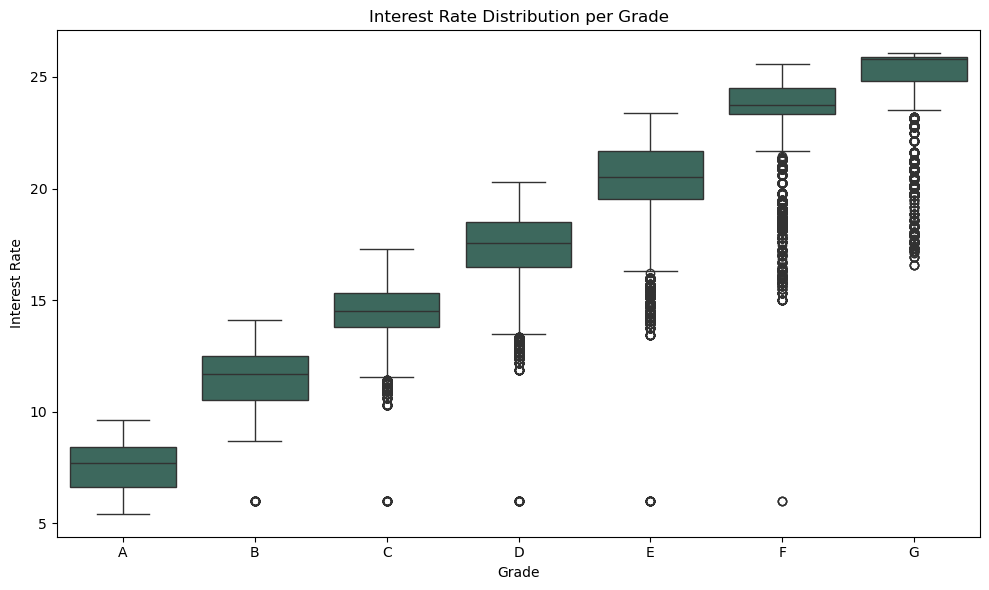

In [145]:
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

plt.figure(figsize=(10, 6), dpi=100)
sns.boxplot(data=df, x='grade', y='int_rate', order=grade_order, color='#366f61')
plt.title('Interest Rate Distribution per Grade')
plt.xlabel('Grade')
plt.ylabel('Interest Rate')
plt.tight_layout()
plt.show()

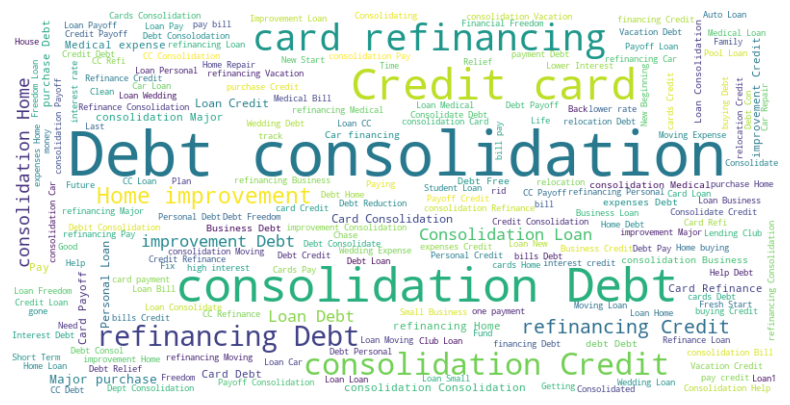

In [153]:
from wordcloud import WordCloud

# Isi null dengan character kosong
df['title'] = df['title'].fillna('')

# Menggabungkan semua teks dari kolom 'title'
text = ' '.join(df['title'])

# Membuat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Menampilkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Menyembunyikan sumbu
plt.show()